In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
df = pd.read_excel('merlion.xlsx', sheet_name='Лист1')

In [6]:
df.head(5)

,Дата Учета,Документ Но.,Сумма,Клиент Но.,Источник формирования
0,2016-01-01,1,2396,TC634628,Терминал
1,2016-01-05,2,2315,TC634748,Терминал
2,2016-01-05,3,2332,TC634688,Сайт
3,2016-01-09,4,2857,TC634809,Терминал
4,2016-01-09,5,2315,TC634869,Колл-центр


In [27]:
# преобразуем строковый тип данных в цифровой
df['source_category'] = df.groupby('Источник формирования').ngroup()
df.head(5)

,Дата Учета,Документ Но.,Сумма,Клиент Но.,Источник формирования,source_category
0,2016-01-01,1,2396,TC634628,Терминал,3
1,2016-01-05,2,2315,TC634748,Терминал,3
2,2016-01-05,3,2332,TC634688,Сайт,1
3,2016-01-09,4,2857,TC634809,Терминал,3
4,2016-01-09,5,2315,TC634869,Колл-центр,0


In [13]:
X = df.loc[:, ['Сумма','source_category']].values # выбираем два столбца для определения кластеров

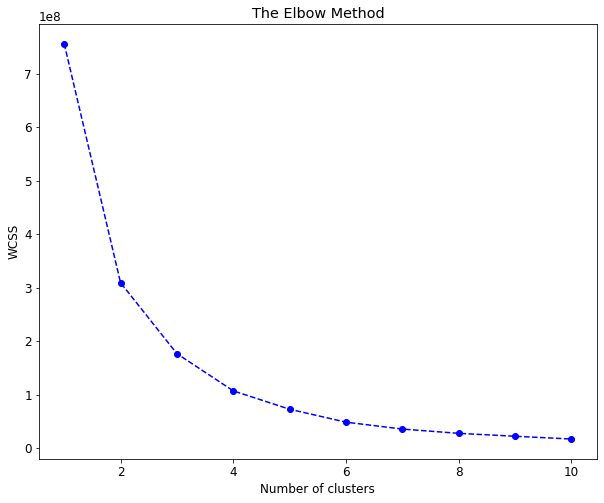

In [14]:
from sklearn.cluster import KMeans   #импорт метода
#строим график для выбора кол-ва кластеров
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')  
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, linestyle='--', marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')    #применяем метод, делим на 4 кластера
y_kmeans = kmeans.fit_predict(X)

In [42]:
clusters = pd.Series(kmeans.labels_)

In [45]:
new_df = pd.concat([df,clusters], axis=1)    # переименовываем столбцы         
new_df.columns = ['Дата Учета','Документ Но.','Сумма','Клиент Но','Источник формирования','source_category','Тип Клиента']

In [46]:
new_df.to_excel('new.xlsx')  